# Import Libraries

In [1]:
#!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Load Datasets

In [2]:
df = pd.read_csv('craigslistVehiclesFull.csv')
df.head(3)

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0


# Quick-look (dimension, data type, summary statistics, columns)

In [3]:
df.shape

(1723065, 26)

***
in the beginning the data consist of 1723065 row and 26 column
***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


In [5]:
df.describe()

,price,year,odometer,lat,long,county_fips,state_fips,weather
count,1.723065e+06,1.716750e+06,1.159011e+06,1.723065e+06,1.723065e+06,1.664232e+06,1.664232e+06,1.663637e+06
mean,1.075540e+05,2.004841e+03,1.136387e+05,3.878195e+01,-9.371198e+01,2.843053e+04,2.834410e+01,5.378706e+01
std,1.004439e+07,1.208772e+01,1.368603e+05,5.976412e+00,1.696519e+01,1.605423e+04,1.603224e+01,7.799381e+00
min,1.000000e+00,3.020000e+02,0.000000e+00,-8.481005e+01,-1.000000e+03,1.001000e+03,1.000000e+00,2.900000e+01
25%,3.295000e+03,2.002000e+03,5.800000e+04,3.491900e+01,-1.058010e+02,1.212300e+04,1.200000e+01,4.800000e+01
50%,7.000000e+03,2.007000e+03,1.070000e+05,3.940989e+01,-8.824070e+01,2.902100e+04,2.900000e+01,5.300000e+01
75%,1.499900e+04,2.012000e+03,1.520000e+05,4.255459e+01,-8.102650e+01,4.106700e+04,4.100000e+01,5.900000e+01
max,2.068627e+09,2.019000e+03,1.000000e+07,9.000000e+01,1.397061e+02,5.604500e+04,5.600000e+01,7.900000e+01


In [6]:
df.columns

Index(['url', 'city', 'price', 'year', 'manufacturer', 'make', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'image_url', 'lat', 'long',
       'county_fips', 'county_name', 'state_fips', 'state_code', 'state_name',
       'weather'],
      dtype='object')

In [7]:
df.nunique().sort_values(ascending=False)

url             1723065
image_url       1227536
vin              316208
lat              275441
long             271604
odometer         172208
make             107445
price             30349
county_fips        3111
county_name        1834
city                470
year                126
manufacturer         53
state_name           52
state_fips           51
state_code           51
weather              26
type                 13
paint_color          12
cylinders             8
condition             6
title_status          6
fuel                  5
size                  4
drive                 3
transmission          3
dtype: int64

# Cleansing Dataset

### Drop all useless columns at this stage (images, links )

In [8]:
df = df.drop(columns=['url', 'image_url'])
df.shape

(1723065, 24)

### Finding average amount of Nans and dropping rows with more Nans than 95% quntile (9 missing values and more are dropped)

In [9]:
df.isnull().sum(axis=1).quantile(.95)

9.0

### 9 missing values per row or more are being dropped (~9300 rows dropped)

In [10]:
df = df[df.isnull().sum(axis=1) < 9]
df.shape

(1635656, 24)

### Drop weird price

In [12]:
print (df.price.describe())

count    1.635656e+06
mean     9.527350e+04
std      9.362402e+06
min      1.000000e+00
25%      3.400000e+03
50%      7.000000e+03
75%      1.499800e+04
max      2.032266e+09
Name: price, dtype: float64


In [13]:
df.drop(df[df.price > 150000].index, inplace = True)
df.shape

(1634554, 24)

***
Drop the price which is more than Q3 (75%)
***

# Identify & Handle missing value

In [14]:
count_missing = df.isnull().sum().sort_values(ascending = False)
count_missing

size            1036125
vin             1035102
condition        621874
type             619615
paint_color      612467
cylinders        607835
drive            578900
odometer         489951
manufacturer      97634
make              42954
weather           34777
county_fips       34380
county_name       34380
state_fips        34380
state_code        34380
fuel               8687
transmission       7581
year               5627
title_status       1225
lat                   0
state_name            0
long                  0
price                 0
city                  0
dtype: int64

***
The data contain much NaN Value which is not good
***

### Drop column with big missing value

In [15]:
df=df.drop(['size'],axis=1)
df=df.drop(['vin'],axis=1)
df.shape

(1634554, 22)

## Fill nan with value
* categoric -> modus
* numeric -> mean

In [16]:
df['condition'] = df['condition'].fillna(df['condition'].mode().values[0])
df['type'] = df['type'].fillna(df['type'].mode().values[0])
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode().values[0])
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode().values[0])
df['drive'] = df['drive'].fillna(df['drive'].mode().values[0])
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode().values[0])
df['make'] = df['type'].fillna(df['type'].mode().values[0])
df['weather'] = df['weather'].fillna(df['weather'].mean())
df['county_fips'] = df['county_fips'].fillna(df['county_fips'].mode().values[0])
df['county_name'] = df['county_name'].fillna(df['county_name'].mode().values[0])
df['state_fips'] = df['state_fips'].fillna(df['state_fips'].mode().values[0])
df['state_code'] = df['state_code'].fillna(df['state_code'].mode().values[0])
df['fuel'] = df['fuel'].fillna(df['fuel'].mode().values[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode().values[0])
df['year'] = df['year'].fillna(df['year'].mode().values[0])
df['title_status'] = df['title_status'].fillna(df['title_status'].mode().values[0])

In [17]:
count_missing2 = df.isnull().sum().sort_values(ascending = False)
count_missing2

weather         0
state_name      0
price           0
year            0
manufacturer    0
make            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
lat             0
long            0
county_fips     0
county_name     0
state_fips      0
state_code      0
city            0
dtype: int64

# Split Categorical & Numerical

In [18]:
df.nunique()#.sort_values(ascending = False)

city               469
price            28996
year               118
manufacturer        53
make                13
condition            6
cylinders            8
fuel                 5
odometer        171465
title_status         6
transmission         3
drive                3
type                13
paint_color         12
lat             262619
long            259091
county_fips       3111
county_name       1834
state_fips          51
state_code          51
state_name          52
weather             27
dtype: int64

In [19]:
kategorik=['city','year', 'manufacturer', 'make', 'condition','cylinders', 'fuel', 'title_status', 'transmission', 
           'drive', 'type', 'paint_color', 'county_fips', 'county_name', 'state_code', 'state_name', 'state_fips', 'weather']
categorical=df[kategorik]
categorical.head(3)

,city,year,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,county_fips,county_name,state_code,state_name,state_fips,weather
0,marshall,2010.0,dodge,coupe,good,6 cylinders,gas,clean,automatic,rwd,coupe,red,46083.0,Lincoln,SD,South Dakota,46.0,38.0
2,marshall,2008.0,ford,sedan,excellent,6 cylinders,gas,clean,automatic,4wd,sedan,white,46093.0,Meade,SD,South Dakota,46.0,38.0
3,marshall,2004.0,ford,sedan,good,6 cylinders,gas,clean,automatic,fwd,sedan,grey,19143.0,Osceola,IA,Iowa,19.0,47.0


In [20]:
numerical=df.drop(kategorik,axis=1)
numerical.head(3)

,price,odometer,lat,long
0,11900,43600.000000,43.4775,-96.7041
2,17550,113989.040744,44.1415,-103.2052
3,2800,168591.000000,43.2845,-95.5930


# Numerical Graph

Text(0.5,1,'Distribution long')

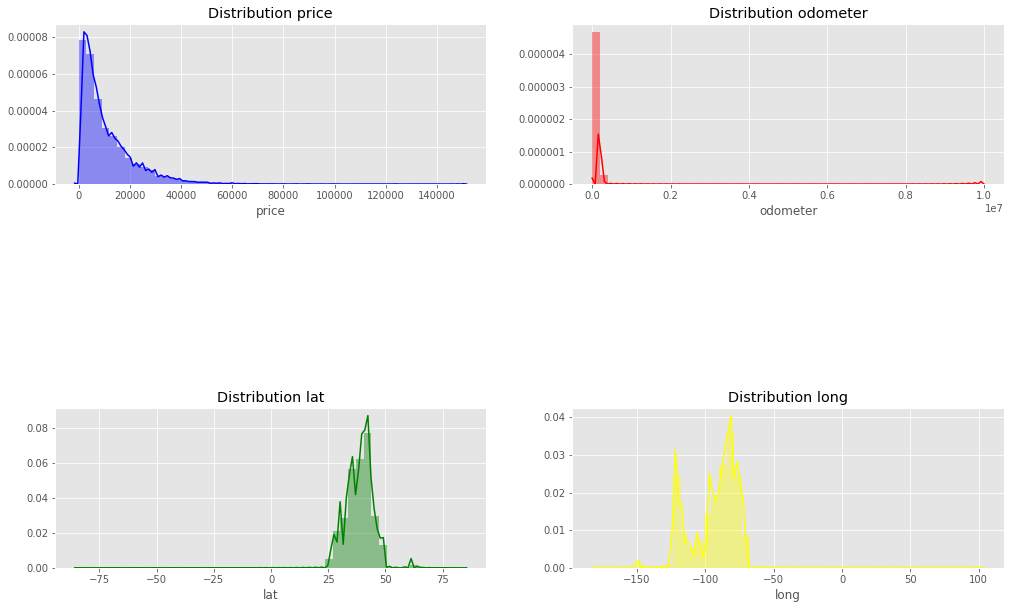

In [21]:
plt.style.use('ggplot')
f=plt.figure(figsize=(17,10))  
f.add_subplot(3,2,1)
sns.distplot(numerical['price'], color='blue').set_title('Distribution price')
f.add_subplot(3,2,2)
sns.distplot(numerical['odometer'], color='red').set_title('Distribution odometer')
f.add_subplot(3,2,5)
sns.distplot(numerical['lat'], color='green').set_title('Distribution lat')
f.add_subplot(3,2,6)
sns.distplot(numerical['long'], color='yellow').set_title('Distribution long')

***
The Graph show us the distribution of each numerical data. So for example we can know that mostly the price of the used car is about 0 - 10000.
***

# Corelation using heatmap

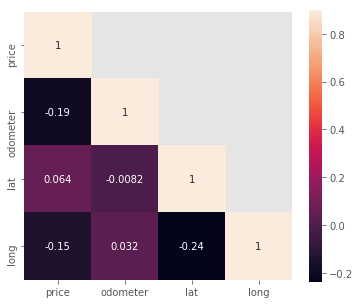

In [22]:
#create correlation
corr = numerical.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(6,5)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

***
We display a heatmap graph with the Pearson method to see correlations between numeric data.
From the heatmap graph above, it can be seen that the correlation among numerical data tends to be low so that it can be concluded that numerical data are not correlated.
***

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Price VS Anything

## Characteristic Price Of all Car 

Text(0.5,1,'Car Price Without Outliers')

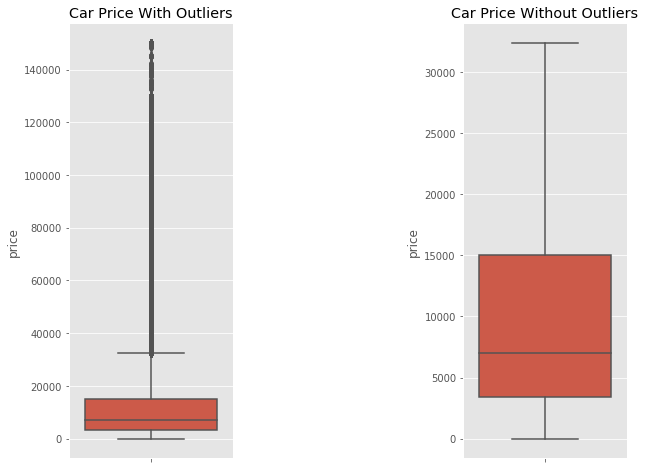

In [103]:
f=plt.figure(figsize=(10,8))
f.add_subplot(1,3,1)
sns.boxplot(y='price', data=df,showfliers=True);
plt.title('Car Price With Outliers')

f.add_subplot(1,3,3)
sns.boxplot(y='price', data=df,showfliers=False);
plt.title('Car Price Without Outliers')

***
### Price Caracteristics : 
    * minimum value : (-+) 0
    * quartil 1     : (-+) 3400
    * median        : (-+) 7000
    * quartile 2    : (-+) 14995
    * maximum value : (-+) 150000 (with outliers)
    
***

## Corelation between car price with sold cars in each year 

Text(0.5,1,'SOLD CAR IN EACH YEAR')

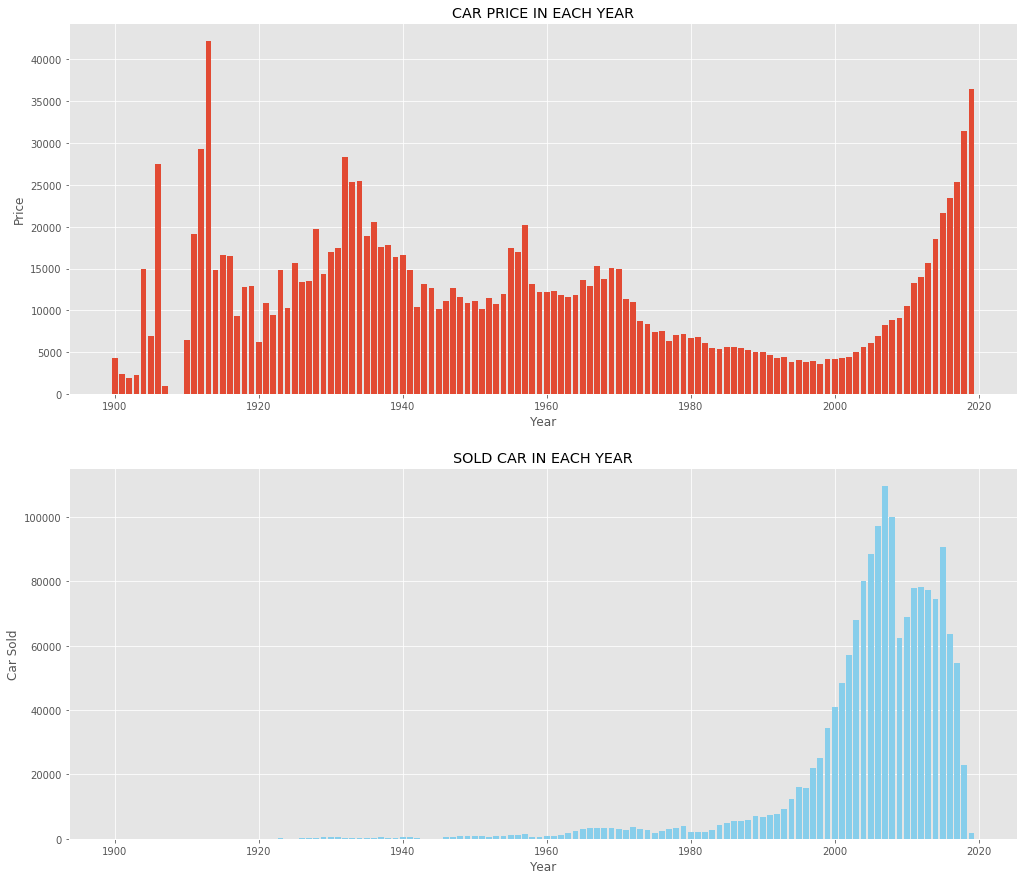

In [27]:
f=plt.figure(figsize=(17,15))
f.add_subplot(2,1,1)
dataa = pd.DataFrame(df[['year', 'price']].groupby('year').mean()['price']).reset_index()
dataa.head()
plt.bar(dataa['year'],dataa['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('CAR PRICE IN EACH YEAR')

f.add_subplot(2,1,2)
datab = pd.DataFrame(df[['year', 'price']].groupby('year').count()['price']).reset_index()
datab.columns=['year', 'sold']
plt.bar(datab['year'],datab['sold'],color="skyblue")
plt.xlabel('Year')
plt.ylabel('Car Sold')
plt.title('SOLD CAR IN EACH YEAR')

***
From the data above, we can see that the level of car purchases before approaching the 2000s is still low. Then the early 2000s the purchased car increased rapidly and one of them was influenced by the factor of falling car prices. Then approaching the 2020s the level of car purchases decreased along with rising car prices.
***

## Corelation between Car Price year with sold cars in each state

### Cars listed per State

In [107]:
statecount = df.state_code.value_counts()

datamap = dict(type='choropleth',
            colorscale = 'deep',
            locations = statecount.index,
            z = statecount,
            locationmode = 'USA-states',
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Cars listed per State"}
            ) 

layout = dict(title = 'Cars sold per State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

choromap = go.Figure(data = [datamap],layout = layout)
iplot(choromap)

In [85]:
stateprice = df[['state_code','price']].groupby('state_code').mean()['price']

datamap = dict(type='choropleth',
            colorscale = 'deep',
            locations = stateprice.index,
            z = statecount,
            locationmode = 'USA-states',
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Cars Price per State"}
            ) 

layout = dict(title = 'Cars Price per State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

choromap = go.Figure(data = [datamap],layout = layout)
iplot(choromap)

***
from the picture above it can be seen that in the left hand corner of the "car listed per state" image, the number of used cars sold tends to be small. this relates to the image of "the car price per state", which the used car price in that part tends to be high
***

## Some factor that affecting car price

Text(0.5,1,'Car drive type vs Price')

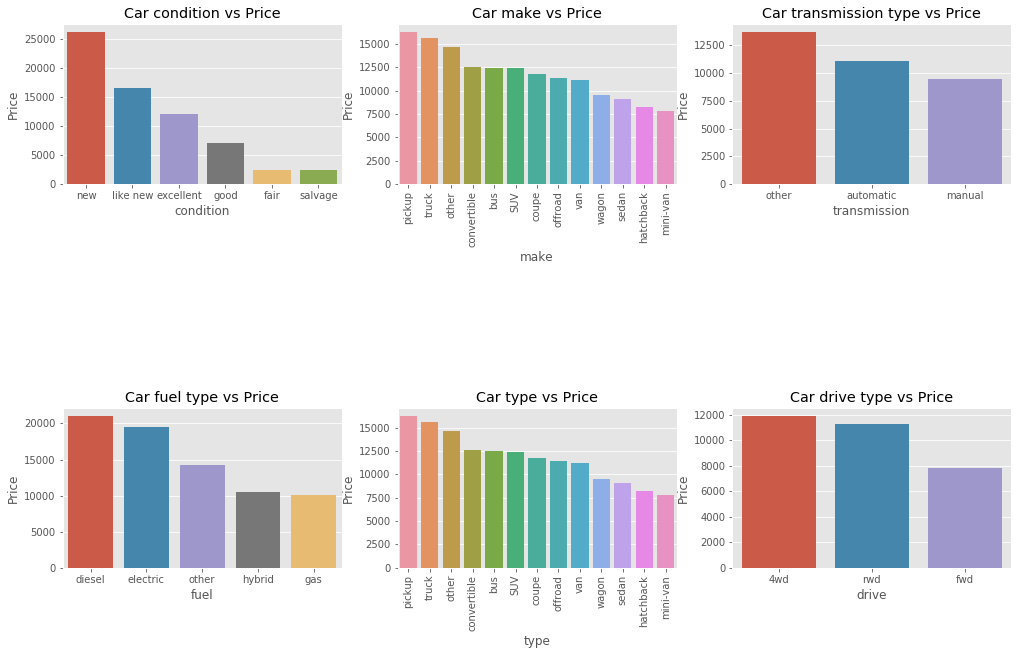

In [66]:
plt.style.use('ggplot')
f=plt.figure(figsize=(17,10))  
f.add_subplot(3,3,1)
con_price = df[['condition', 'price']].groupby('condition').mean()['price'].sort_values(ascending = False)
sns.barplot(x=con_price.index, y=con_price)
plt.xlabel('condition')
plt.ylabel('Price')
plt.title('Car condition vs Price')

f.add_subplot(3,3,2)
mak_price = df[['make', 'price']].groupby('make').mean()['price'].sort_values(ascending = False)
sns.barplot(x=mak_price.index, y=mak_price)
plt.xticks(rotation = 90)
plt.xlabel('make')
plt.ylabel('Price')
plt.title('Car make vs Price')

f.add_subplot(3,3,3)
tra_price = df[['transmission', 'price']].groupby('transmission').mean()['price'].sort_values(ascending = False)
sns.barplot(x=tra_price.index, y=tra_price)
plt.xlabel('transmission')
plt.ylabel('Price')
plt.title('Car transmission type vs Price')

f.add_subplot(3,3,7)
fue_price = df[['fuel', 'price']].groupby('fuel').mean()['price'].sort_values(ascending = False)
sns.barplot(x=fue_price.index, y=fue_price)
plt.xlabel('fuel')
plt.ylabel('Price')
plt.title('Car fuel type vs Price')

f.add_subplot(3,3,8)
typ_price = df[['type', 'price']].groupby('type').mean()['price'].sort_values(ascending = False)
sns.barplot(x=typ_price.index, y=typ_price)
plt.xticks(rotation = 90)
plt.xlabel('type')
plt.ylabel('Price')
plt.title('Car type vs Price')

f.add_subplot(3,3,9)
dri_price = df[['drive', 'price']].groupby('drive').mean()['price'].sort_values(ascending = False)
sns.barplot(x=dri_price.index, y=dri_price)
plt.xlabel('drive')
plt.ylabel('Price')
plt.title('Car drive type vs Price')


***
from the graph above we be see that some components and types of cars are affected to the price of the car. Cars tend to be expensive if the conditions are new, the type is pick up, the fuel is diesel, etc. Conversely the price of a car tends to be low if the fuel is gas, the type is a mini-van, and the condition is salvage, etc.
***

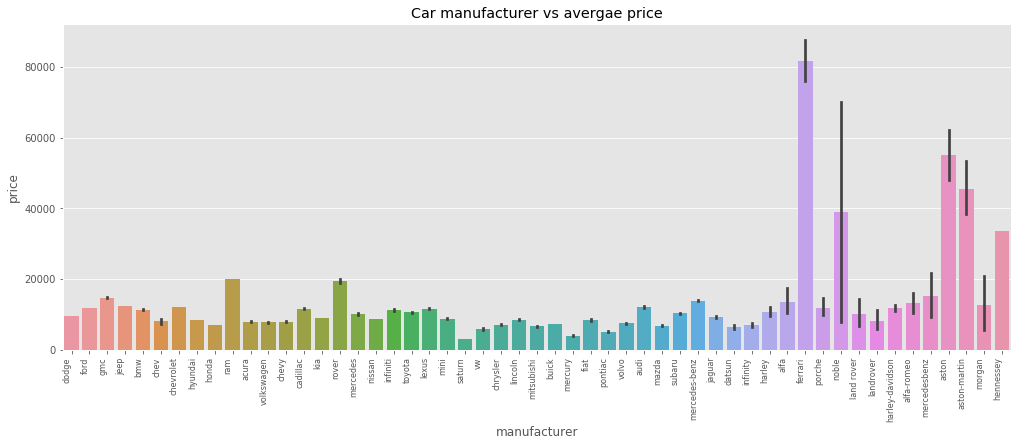

In [25]:
#f=plt.figure(figsize=(17,5))
#sns.barplot(x="manufacturer", y="price", data=df)
plt.figure(figsize=(17,6))
ax = sns.barplot(x='manufacturer', y='price', data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Car manufacturer vs avergae price");

***
from the graph above we be see that the manufacturers who have the highest average car price is ferrari
***

## Is the price of each color of the car effect on count of sold car

Text(0.5,1,'Car paint_color vs Sold Car')

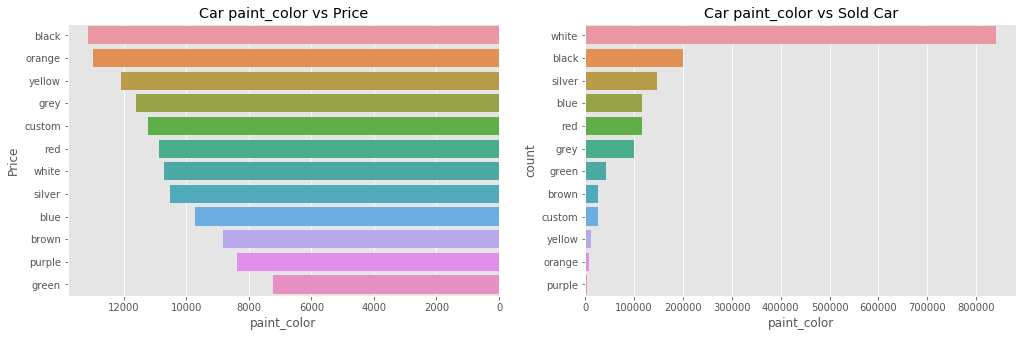

In [121]:
plt.style.use('ggplot')
f=plt.figure(figsize=(17,5))  
f.add_subplot(1,2,1)
dri_price = df[['paint_color', 'price']].groupby('paint_color').mean()['price'].sort_values(ascending = False)
sns.barplot(y=dri_price.index, x=dri_price).invert_xaxis()
plt.xlabel('paint_color')
plt.ylabel('Price')
plt.title('Car paint_color vs Price')
f.add_subplot(1,2,2)
dri_price = df[['paint_color', 'price']].groupby('paint_color').count()['price'].sort_values(ascending = False)
sns.barplot(y=dri_price.index, x=dri_price)
plt.xlabel('paint_color')
plt.ylabel('count')
plt.title('Car paint_color vs Sold Car')

***
In general, based on the 2 graphs above, used cars sold are white cars and white cars are quite expensive. black cars that have the most expensive prices are in the second rank. while the green cars with the lowest prices are also low in demand
***